             Date Month  Day    Price     Open     High      Low   Volume    Chg%
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M  0.0020
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K  0.0043
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K -0.0020
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K -0.0026
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K -0.0023
5    Jun 22, 2021   Jun  Tue  2083.00  2100.00  2128.35  2075.00    1.29M  0.0030
6    Jun 21, 2021   Jun  Mon  2076.85  2000.00  2093.75  1981.15    1.69M  0.0324
7    Jun 18, 2021   Jun  Fri  2011.70  2070.25  2070.25  1978.65    1.30M -0.0189
8    Jun 17, 2021   Jun  Thu  2050.40  2070.00  2088.95  2036.40  754.28K -0.0189
9    Jun 16, 2021   Jun  Wed  2089.95  2109.45  2121.95  2075.30  856.94K -0.0038
10   Jun 15, 2021   Jun  Tue  2097.95  2071.00  2139.85  2062.00    1.91M  0.0163
11   Jun 14, 202

C:\Users\sheet\AppData\Local\Temp\ipykernel_2592\233362812.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wed_prices['Chg%'] = wed_prices['Chg%'].astype(str)
C:\Users\sheet\AppData\Local\Temp\ipykernel_2592\233362812.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wed_prices['Chg%'] = wed_prices['Chg%'].str.rstrip('%').astype(float)


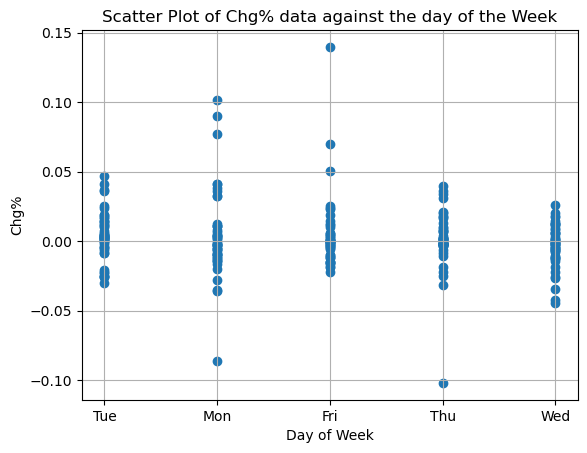

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("Lab 2.xlsx", sheet_name= 'IRCTC Stock Price', usecols= 'A:I')
print(df.to_string())

Mean = df["Price"].mean()
print("Mean is", Mean)

Variance = df["Price"].var()
print("Variance is", Variance)


wed_prices = df[df['Day'] == "Wed"]
print(wed_prices.to_string())
Wednesday_mean = wed_prices["Price"].mean()
print("Wednesday's mean is", Wednesday_mean)
population_mean = df['Price'].mean()
print("population's mean is", population_mean)


df['Date'] = pd.to_datetime(df['Date'])
april_prices = df[df['Date'].dt.month == 4]
april_mean = april_prices['Price'].mean()

print("April Prices:\n", april_prices)
print("April's mean is", april_mean)
print("Population's mean is", population_mean)



df['Date'] = pd.to_datetime(df['Date'])
df['Chg%'] = df['Chg%'].astype(str)
df['Chg%'] = df['Chg%'].str.rstrip('%').astype(float)
loss_count = df['Chg%'].apply(lambda x: 1 if x<0 else 0).sum()
total_count = df['Chg%'].count()

probability_loss = loss_count/total_count
print(f'probability of loss {probability_loss:.4f}')


wed_prices['Chg%'] = wed_prices['Chg%'].astype(str)
wed_prices['Chg%'] = wed_prices['Chg%'].str.rstrip('%').astype(float)
wednesday_profit_count = wed_prices['Chg%'].apply(lambda x: 1 if x>0 else 0).sum()
total_wednesday = wed_prices['Chg%'].count()
wednesday_profit = wednesday_profit_count / total_wednesday
print(f'probability of profit on wednesday {wednesday_profit:.4f}')


cond_prob_wed = wednesday_profit_count/total_wednesday
print(f'conditional probability of profit on wednesday {cond_prob_wed:.4f}')


plt.scatter(df['Day'], df['Chg%'])
plt.xlabel('Day of Week')
plt.ylabel('Chg%')
plt.title('Scatter Plot of Chg% data against the day of the Week')
plt.grid(True)
plt.show()

In [117]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

df = pd.read_excel("Lab 2.xlsx", sheet_name= 'thyroid0387_UCI', usecols= 'A:I')
print(df.to_string())
print("Original DataFrame:")
print(df.columns)
categorical_cols = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                    'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
                    'TBG measured', 'referral source', 'Condition']

numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

categorical_cols = [col for col in categorical_cols if col in df.columns]
print("Updated categorical_cols:", categorical_cols)

label_encoder = LabelEncoder()

for col in categorical_cols:
    
    if df[col].dtype == 'object':
        df[col].replace('?', np.nan, inplace=True)
        df[col] = df[col].astype(str)  
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[[col]] = imputer.fit_transform(df[[col]])  
        df[col] = label_encoder.fit_transform(df[col])
    else:
        df[col] = label_encoder.fit_transform(df[col])

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
print("DataFrame after handling missing values and converting to numeric:")
print(df)
print("Data range for numeric variables:")
for col in numeric_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

print("Presence of missing values in each attribute:")
print(df.isnull().sum())

print("Presence of outliers in numeric variables (using z-score method):")
for col in numeric_cols:
    if df[col].dtype in ['int64', 'float64']:  
        z_scores = np.abs(zscore(df[col].dropna()))
        outliers = np.where(z_scores > 3)[0]
        if len(outliers) > 0:
            print(f"{col}: {len(outliers)} outliers found")
        else:
            print(f"{col}: No outliers found")
    else:
        print(f"{col}: Not numeric type, skipping z-score calculation")

print()

print("Mean and variance (or standard deviation) for numeric variables:")
for col in numeric_cols:
    if df[col].dtype in ['int64', 'float64']:  
        mean = df[col].mean()
        
        variance = df[col].var()
        print(f"{col}: Mean = {mean}, Variance = {variance}")
    else:
        print(f"{col}: Not numeric type, skipping mean and variance calculation")

      Record ID    age sex on thyroxine query on thyroxine on antithyroid medication sick pregnant thyroid surgery
0     840801013     29   F            f                  f                         f    f        f               f
1     840801014     29   F            f                  f                         f    f        f               f
2     840801042     41   F            f                  f                         f    f        f               f
3     840803046     36   F            f                  f                         f    f        f               f
4     840803047     32   F            f                  f                         f    f        f               f
5     840803048     60   F            f                  f                         f    f        f               f
6     840803068     77   F            f                  f                         f    f        f               f
7     840807019     28   F            f                  f                      

C:\Users\sheet\AppData\Local\Temp\ipykernel_2592\3726242011.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('?', np.nan, inplace=True)
C:\Users\sheet\AppData\Local\Temp\ipykernel_2592\3726242011.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

KeyError: 'TSH'

In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

df = pd.read_excel("Lab 2.xlsx", sheet_name='thyroid0387_UCI', usecols='A:I')
print(df.columns)  # Print column names to debug

# Define categorical and numeric columns
categorical_cols = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                    'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
                    'TBG measured', 'referral source', 'Condition']
numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

# Update categorical_cols and numeric_cols based on actual columns present in df
categorical_cols = [col for col in categorical_cols if col in df.columns]
numeric_cols = [col for col in numeric_cols if col in df.columns]

print("Updated categorical_cols:", categorical_cols)  # Print updated categorical_cols
print("Updated numeric_cols:", numeric_cols)  # Print updated numeric_cols

label_encoder = LabelEncoder()

for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col].replace('?', np.nan, inplace=True)
        df[col] = df[col].astype(str)
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[[col]] = imputer.fit_transform(df[[col]])
        df[col] = label_encoder.fit_transform(df[col])
    else:
        df[col] = label_encoder.fit_transform(df[col])

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("DataFrame after handling missing values and converting to numeric:")
print(df)
print("Data range for numeric variables:")
for col in numeric_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

print("Presence of missing values in each attribute:")
print(df.isnull().sum())

print("Presence of outliers in numeric variables (using z-score method):")
for col in numeric_cols:
    if df[col].dtype in ['int64', 'float64']:
        z_scores = np.abs(zscore(df[col].dropna()))
        outliers = np.where(z_scores > 3)[0]
        if len(outliers) > 0:
            print(f"{col}: {len(outliers)} outliers found")
        else:
            print(f"{col}: No outliers found")
    else:
        print(f"{col}: Not numeric type, skipping z-score calculation")

print()

print("Mean and variance (or standard deviation) for numeric variables:")
for col in numeric_cols:
    if df[col].dtype in ['int64', 'float64']:
        mean = df[col].mean()
        variance = df[col].var()
        print(f"{col}: Mean = {mean}, Variance = {variance}")
    else:
        print(f"{col}: Not numeric type, skipping mean and variance calculation")


Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery'],
      dtype='object')
Updated categorical_cols: ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery']
Updated numeric_cols: ['age']
DataFrame after handling missing values and converting to numeric:
      Record ID  age  sex  on thyroxine  query on thyroxine  \
0     840801013   29    0             0                   0   
1     840801014   29    0             0                   0   
2     840801042   41    0             0                   0   
3     840803046   36    0             0                   0   
4     840803047   32    0             0                   0   
...         ...  ...  ...           ...                 ...   
9167  870119022   56    1             0                   0   
9168  870119023   22    1             0                   0   
9169  870119025   69    1 

C:\Users\sheet\AppData\Local\Temp\ipykernel_2592\1506860839.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('?', np.nan, inplace=True)
C:\Users\sheet\AppData\Local\Temp\ipykernel_2592\1506860839.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 